In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
import pickle
import numpy as np
import pandas as pd


In [3]:
dataset = pd.read_csv("./../caputarCaracteristicas/data-2.csv")
X = dataset[['rgbFogoMedio', 'rgbFumacaMedio', 'qtdMovimentoFogo', 'qtdMovimentoFumaca', 'tamanhoFogo', 'tamamnhoFumaca']]
# X = dataset[['rgbFogoR', 'rgbFogoG', 'rgbFogoB', 'rgbFumacaR', 'rgbFumacaG', 'rgbFumacaB', 'qtdMovimentoFogo', 'qtdMovimentoFumaca', 'tamanhoFogo', 'tamamnhoFumaca']]
y = dataset['temFogo']

X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=42)

In [16]:
bayesClassifier = GaussianNB()
# bayesClassifier = CategoricalNB()
# bayesClassifier = BernoulliNB()
# bayesClassifier = MultinomialNB()
# bayesClassifier = ComplementNB()
bayesClassifier.fit(X_train, y_train)

y_pred = bayesClassifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_result)

Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

       False       0.63      1.00      0.78        19
        True       1.00      0.48      0.65        21

    accuracy                           0.72        40
   macro avg       0.82      0.74      0.71        40
weighted avg       0.83      0.72      0.71        40



MATRIZ DE CONFUSAO

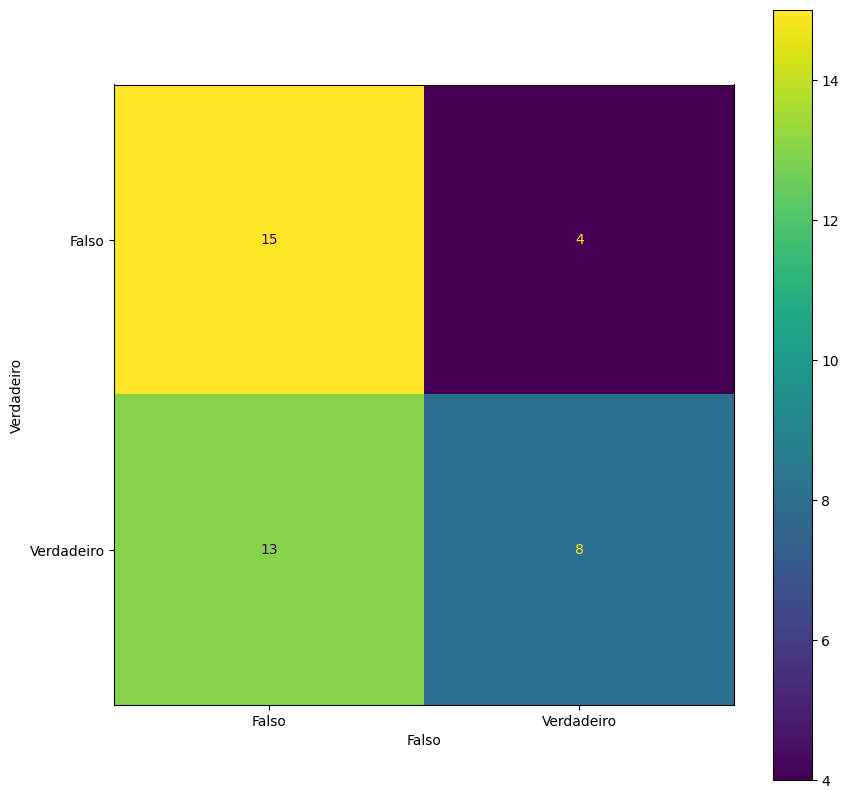

In [15]:
import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Falso', 'Verdadeiro'])
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax)
cm_display.ax_.set(xlabel='Falso', ylabel='Verdadeiro')
plt.show() 

In [6]:
clf = AdaBoostClassifier()
param_grid_nb = {'n_estimators':[1, 5, 10],
              'learning_rate':[0.1, 1, 2]}
nbModel_grid = GridSearchCV(estimator=clf, param_grid=param_grid_nb, verbose=1, cv=10)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)
print(accuracy_score(y_test, y_pred))

Fitting 10 folds for each of 9 candidates, totalling 90 fits


/home/mangellan/.local/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/mangellan/.local/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/mangellan/.local/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/mangellan/.local/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this wa

AdaBoostClassifier(learning_rate=1, n_estimators=10)
0.725


/home/mangellan/.local/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/mangellan/.local/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/mangellan/.local/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/mangellan/.local/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this wa

In [13]:
with open('modelCategorical.pkl','wb') as f:
    pickle.dump(bayesClassifier,f)

MODELO PARA NAO BASEIANAS

In [5]:
dataset = pd.read_csv("./../caputarCaracteristicas/dataNotBayes.csv")
X = dataset[['rgbFogoR', 'rgbFogoG', 'rgbFogoB', 'rgbFumacaR', 'rgbFumacaG', 'rgbFumacaB', 'qtdMovimentoFogo', 'qtdMovimentoFumaca', 'tamanhoFogo', 'tamamnhoFumaca']]
y = dataset['quantidadeFogo']

X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=42)

In [19]:
regression = LinearRegression()

regression.fit(X_train, y_train)

accuracy = regression.score(X_test, y_test)
print(f"Accuracy: {accuracy*100:.2f}")

Accuracy: 44.53


In [7]:
with open('modelRegression.pkl','wb') as f:
    pickle.dump(regression,f)